In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config Inline.Backend.figure_format = 'svg'

In [95]:
# Accessing previously cleaned df
df = pd.read_csv('cleaned_mta_df.csv', parse_dates=["DATETIME"], index_col=0)
df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,59 ST,2021-07-31 04:00:00,5,11.0,3.0,14.0
1,59 ST,2021-07-31 08:00:00,5,5.0,13.0,18.0
2,59 ST,2021-07-31 12:00:00,5,38.0,52.0,90.0
3,59 ST,2021-07-31 16:00:00,5,122.0,33.0,155.0
4,59 ST,2021-07-31 20:00:00,5,155.0,30.0,185.0


In [96]:
##Final clean up on df for creating tables and plots
# Create DATE and TIME column for easier access later
df["DATE"] = pd.to_datetime(df['DATETIME']).dt.date
df["TIME"] = pd.to_datetime(df['DATETIME']).dt.time
df['DAY_OF_WEEK'] = pd.to_datetime(df['DATETIME']).dt.dayofweek
df.head()

,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC,DATE,TIME
0,59 ST,2021-07-31 04:00:00,5,11.0,3.0,14.0,2021-07-31,04:00:00
1,59 ST,2021-07-31 08:00:00,5,5.0,13.0,18.0,2021-07-31,08:00:00
2,59 ST,2021-07-31 12:00:00,5,38.0,52.0,90.0,2021-07-31,12:00:00
3,59 ST,2021-07-31 16:00:00,5,122.0,33.0,155.0,2021-07-31,16:00:00
4,59 ST,2021-07-31 20:00:00,5,155.0,30.0,185.0,2021-07-31,20:00:00


## Initial Analysis On Distribution of Traffic Across Stations

In [102]:
# Table for each STATION daily TOTAL TRAFFIC
station_daily = df.groupby(["STATION","DATE"])[['TOTAL_TRAFFIC']].sum().reset_index()
station_daily.head()

,STATION,DATE,TOTAL_TRAFFIC
0,1 AV,2021-07-31,16446.0
1,1 AV,2021-08-01,17734.0
2,1 AV,2021-08-02,20062.0
3,1 AV,2021-08-03,21323.0
4,1 AV,2021-08-04,22068.0


In [103]:
# Table for each STATION sum TOTAL TRAFFIC
"""
Sum up the total ridership for each station and sort them based on traffic volume
to find out the traffic pattern and top 10 stations with the highest traffic
"""
stations_total = station_daily.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

stations_total.head(11)

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,10195910.00
1,34 ST-HERALD SQ,7763440.25
2,GRD CNTRL-42 ST,7682536.25
3,14 ST-UNION SQ,7001279.25
4,86 ST,6894765.00
5,42 ST-PORT AUTH,6595128.25
6,23 ST,6399783.00
7,125 ST,6089729.00
8,TIMES SQ-42 ST,5981350.25
9,FULTON ST,5638357.75


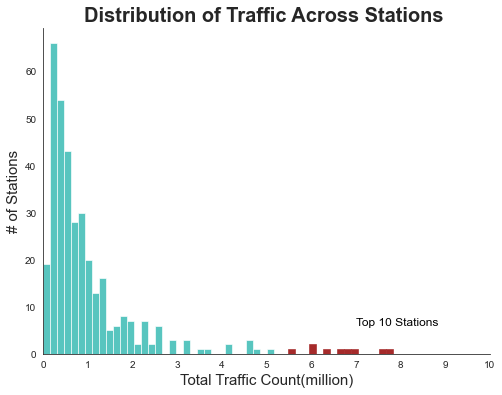

In [99]:
# Distribution Plot on ridership across stations
plt.figure(figsize=[8,6])
sns.set_style("white")
ax = sns.histplot(stations_total['TOTAL_TRAFFIC'], bins=65, color="lightseagreen")
plt.text(7000000, 6, "Top 10 Stations", horizontalalignment='left', size='large', color='black')
for p in ax.patches:
    if p.get_x() >= stations_total.iloc[10]['TOTAL_TRAFFIC']:
        p.set_color('brown')

plt.title("Distribution of Traffic Across Stations ",size=20,weight='bold')
plt.xlabel("Total Traffic Count(million)", size=15)
plt.ylabel("# of Stations", size=15)
plt.xlim([0,1100000])
plt.xticks(range(0,11000000,1000000),[str(int(i/1000000)) for i in range(0,11000000,1000000)])
sns.despine();

# plt.savefig("DistributionOfTraffic.png")

### 1. What are the top 10 popular station?

In [27]:
station_avg = station_daily.groupby('STATION').mean().round(0)\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

station_avg.head(10)    

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,112043.0
1,34 ST-HERALD SQ,85313.0
2,GRD CNTRL-42 ST,84423.0
3,14 ST-UNION SQ,76937.0
4,86 ST,75767.0
5,42 ST-PORT AUTH,72474.0
6,23 ST,70327.0
7,125 ST,66920.0
8,TIMES SQ-42 ST,65729.0
9,FULTON ST,61960.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


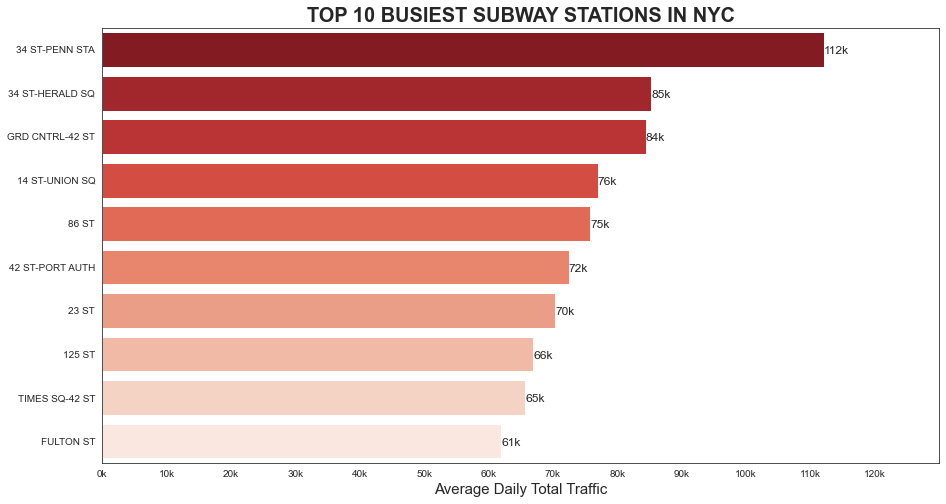

In [59]:
# Barplot for top 10 busiest subway
top_10_avg_daily = station_avg[:10]
plt.figure(figsize=[15,8])
sns.set_style("white")
palette = sns.color_palette("Reds",n_colors=10)
palette.reverse()
ax = sns.barplot('TOTAL_TRAFFIC', 'STATION', data=top_10_avg_daily, orient="horizontal", palette=palette)

plt.title('TOP 10 BUSIEST SUBWAY STATIONS IN NYC', size=20, weight='bold')
plt.xlabel("Average Daily Total Traffic", size=15)
plt.ylabel("")
plt.xlim([0,130000])
plt.xticks(range(0,130000,10000),[str(int(i/1000))+"k" for i in range(0,130000,10000)], size=10)
plt.yticks(size=10)
for p in ax.patches:
        ax.annotate(str(int(p.get_width()/1000))+'k', (p.get_width(), p.get_y()+0.5), size=12);


### 2. What is the traffic pattern in those stations? Which day of the week and what time of the day have higher ridership?

In [141]:
# Top 10 Stations list
top10_list = list(top_10_avg_daily['STATION'])
print(top10_list)

# Top 10 Stations df
top10_df = df[df['STATION'].isin(top10_list)]
top10_df.head()

['34 ST-PENN STA', '34 ST-HERALD SQ', 'GRD CNTRL-42 ST', '14 ST-UNION SQ', '86 ST', '42 ST-PORT AUTH', '23 ST', '125 ST', 'TIMES SQ-42 ST', 'FULTON ST']


,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC,DATE,TIME
38506,TIMES SQ-42 ST,2021-07-31 04:00:00,5,36.0,56.0,92.0,2021-07-31,04:00:00
38507,TIMES SQ-42 ST,2021-07-31 08:00:00,5,36.0,77.0,113.0,2021-07-31,08:00:00
38508,TIMES SQ-42 ST,2021-07-31 12:00:00,5,112.0,314.0,426.0,2021-07-31,12:00:00
38509,TIMES SQ-42 ST,2021-07-31 16:00:00,5,214.0,418.0,632.0,2021-07-31,16:00:00
38510,TIMES SQ-42 ST,2021-07-31 20:00:00,5,195.0,369.0,564.0,2021-07-31,20:00:00


### Prepare Data For Dashboard 

* Create Dataset contains (STATION, DAY_OF_WEEK, DATE, TOTAL_TRAFFIC, WEEK_DAY) columns for dashboard 

In [ ]:
# Top 10 Stations daily
top10_daily = top10_df.groupby(["STATION","DATE","DAY_OF_WEEK"])\
    [['TOTAL_TRAFFIC']].sum().reset_index()

top10_daily

In [153]:
# Dictionary of the day 
dow_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [ ]:
# Implement the dict into datset
top10_daily['WEEK_DAY'] = top10_daily.DAY_OF_WEEK.map(dow_dict)

top10_daily.to_csv('das_dataset.csv')

In [159]:
# Save the dataset
top10_daily.to_csv('dash_dataset.csv',  index=False)

In [67]:
## Create Pivot table for Day_of_Week vs Stations traffic pattern
# Top 10 Stations daily 
top10_daily = top10_df.groupby(["STATION","DATE","DAY_OF_WEEK"])[['TOTAL_TRAFFIC']].sum().reset_index()

# Top 10 Stations avg day of week
top10_dow = top10_daily.groupby(['STATION','DAY_OF_WEEK'])['TOTAL_TRAFFIC']\
                .mean().round(0)\
                .reset_index().sort_values('TOTAL_TRAFFIC',ascending=False)

# Turn top10_dow_hm into pivot table for heatmap
top10_dow_hm = top10_dow.pivot(index=["STATION"], columns=['DAY_OF_WEEK'], values='TOTAL_TRAFFIC')
print(top10_dow_hm.columns)
top10_dow_hm.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
top10_dow_hm = top10_dow_hm.reindex(top10_list)
top10_dow_hm

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DAY_OF_WEEK')


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,114427.0,124900.0,126798.0,125127.0,128113.0,88801.0,76136.0
34 ST-HERALD SQ,85563.0,92466.0,95097.0,94359.0,97169.0,72692.0,59841.0
GRD CNTRL-42 ST,88102.0,101240.0,102692.0,102264.0,95353.0,57032.0,44283.0
14 ST-UNION SQ,76400.0,81846.0,87101.0,83528.0,88206.0,70272.0,51206.0
86 ST,77831.0,86091.0,86542.0,87399.0,88790.0,57986.0,45727.0
42 ST-PORT AUTH,73255.0,79429.0,81751.0,81196.0,83596.0,59478.0,48613.0
23 ST,71358.0,81720.0,85052.0,82306.0,80652.0,52027.0,39176.0
125 ST,68368.0,73844.0,75537.0,74293.0,77761.0,54424.0,44214.0
TIMES SQ-42 ST,63814.0,69265.0,72085.0,71331.0,70581.0,62523.0,50505.0


In [94]:
top10_dow_hm.to_csv('dash_data.csv')

In [68]:
## Create Pivot table for Day_of_Week vs Time_Period traffic pattern
# Timeperiod dictionary
top10_df['TIME']= top10_df.TIME.astype('str')
time_period = {
    "04:00:00": "00:00-04:00",
    "08:00:00": "04:00-08:00",
    "12:00:00": "08:00-12:00",
    "16:00:00": "12:00-16:00",
    "20:00:00": "16:00-20:00",
    "00:00:00": "20:00-00:00"
}
top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)

# Group by Date and time for total count across the stations
top10_period = top10_df.groupby(['DATE', 'DAY_OF_WEEK', 'TIME_PERIOD'])['TOTAL_TRAFFIC']\
                        .sum().round(0).reset_index()

# Group by Day of Week and time period for the average count
period_time = top10_period.groupby(['DAY_OF_WEEK', 'TIME_PERIOD'])['TOTAL_TRAFFIC']\
                            .mean().round().reset_index()

# Pivot table for time vs day of week
time_vs_day = period_time.pivot(index=["TIME_PERIOD"], columns=['DAY_OF_WEEK'], values='TOTAL_TRAFFIC')
time_vs_day.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_vs_day

/var/folders/zj/h4lkddcs4fl9m1km9f9qfffc0000gn/T/ipykernel_4106/3565660591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME']= top10_df.TIME.astype('str')
/var/folders/zj/h4lkddcs4fl9m1km9f9qfffc0000gn/T/ipykernel_4106/3565660591.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME_PERIOD,,,,,,,
00:00-04:00,11927.0,11569.0,12426.0,14349.0,15318.0,22150.0,21169.0
04:00-08:00,125650.0,142138.0,144405.0,136363.0,127333.0,42501.0,28647.0
08:00-12:00,172367.0,191232.0,196482.0,190761.0,179810.0,119616.0,90496.0
12:00-16:00,196240.0,206335.0,214008.0,211473.0,232371.0,174862.0,136924.0
16:00-20:00,217213.0,245078.0,247911.0,248493.0,247456.0,168340.0,127587.0
20:00-00:00,59476.0,65656.0,71596.0,73598.0,80034.0,100308.0,89298.0


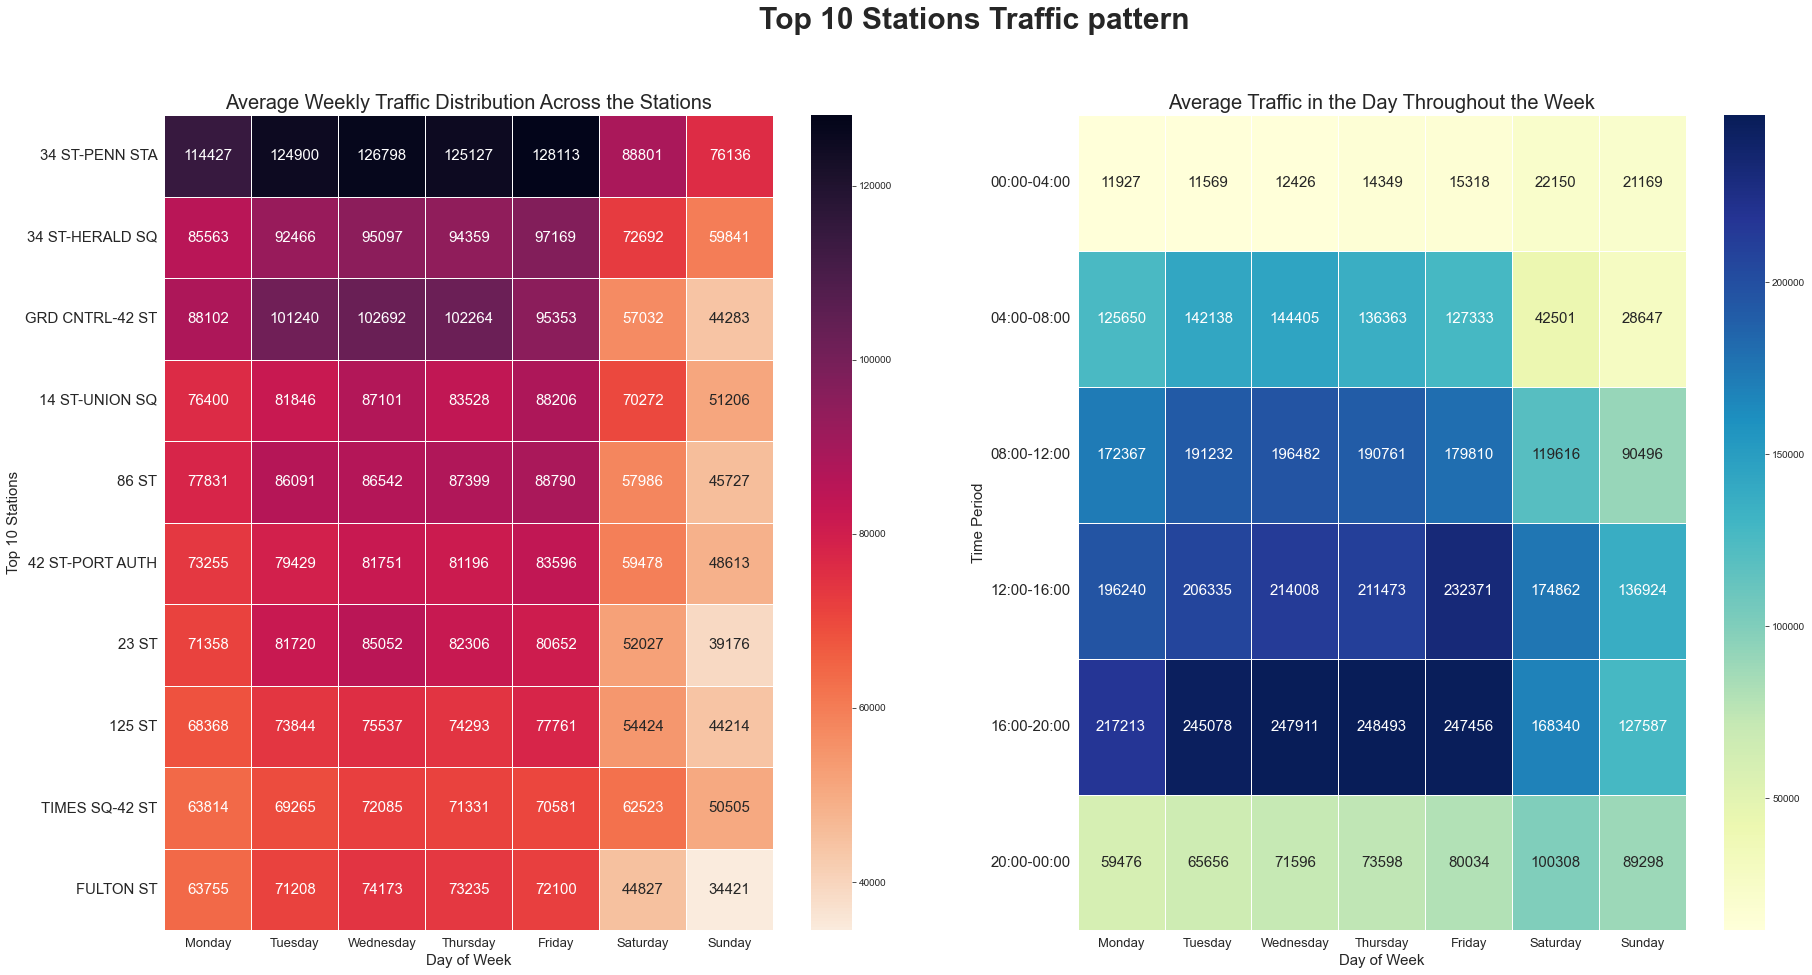

In [92]:
# Heatmaps for traffic pattern in top 10 stations
plt.figure(figsize=[30,15])
plt.suptitle("Top 10 Stations Traffic pattern", size=30, weight='bold')
plt.subplot(1,2,1)
sns.heatmap(top10_dow_hm, cmap='rocket_r', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("Average Weekly Traffic Distribution Across the Stations", size=20)
plt.xlabel("Day of Week", size=15)
plt.ylabel("Top 10 Stations", size=15)
plt.xticks(size=13)
plt.yticks(size=15, rotation=0)

plt.subplot(1,2,2)
sns.heatmap(time_vs_day, cmap='YlGnBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("Average Traffic in the Day Throughout the Week", size=20)
plt.xlabel("Day of Week", size=15)
plt.ylabel("Time Period", size=15)
plt.xticks(size=13)
plt.yticks(size=15, rotation = 0);